Machine Learning for Cancer Prediction
The data used for this tutorial is an RNA-seq gene expression data for different cancer types. The rows represent cancer samples and the columns represent gene count values. The last column contains the cancer categories.

Required Libraries
numpy
matplotlib
seaborn
pandas
scikit
Import Python libraries

In [1]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
# remember confusion matrices lets import that and execute it later

 Read data

In [11]:
#read data directly from a github repository

file_url='survey lung cancer.csv'
# we can also use direct csv or excel file from out local system and use pandas to read them.
dataframe=pd.read_csv(file_url)

In [12]:
dataframe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [13]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Here we can observe the following:

AGE - The dataset is mostly of elderly people with mean and median both around 62 years. Although low age groups are also present. Minimum being - 21 years.
SMOKING - The dataset is mostly composed of people who smokes. Inferred from mean. As values are either 1 or 2 mean should be 1.5 if perfectly balanced.
YELLOW_FINGERS - The dataset is mostly composed of people with yellow fingers. Inferred from mean.
ANXIETY - The dataset is balanced in this regard.
PEER_PRESSURE - The dataset is balanced in this regard.
CHRONIC_DISEASE - The dataset is balanced in this regard.
FATIGUE - The dataset mostly composes of people with signs of fatigueness.
ALLERGY - The dataset mostly composes of people with allergy.
WHEEZING - The dataset mostly composes of people with wheezing symptom.
ALCOHOL CONSUMING - The dataset mostly composes of people who consumes alcohol.
COUGHING - The dataset mostly composes of people with coughing symptom.
SHORTNESS OF BREATH - The dataset mostly composes of people with shortness of breath.
SWALLOWING DIFFICULTY - The dataset mostly composes of people with not having difficulty with swallowing.
CHEST PAIN - The dataset mostly composes of people with chest pain.

In [14]:
dataframe.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [15]:
#let's check the number of samples and features
#note:the last column contain the labels. it is not considered as a feature

print(dataframe.shape)

(309, 16)


In [17]:
#let's check some of the columns (first, second and third columns)
print(dataframe.columns[0:3])


Index(['GENDER', 'AGE', 'SMOKING'], dtype='object')


In [18]:
#lets check the name of the last column of this dataframe

dataframe.columns[-1]


'LUNG_CANCER'

In [19]:
#check for missing values
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [21]:
#let's check how many different cancer types are there in the data
#note: in this tutorial the cancer types will be referred to as classes or labels

print(dataframe['LUNG_CANCER'].value_counts())

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64


<Axes: >

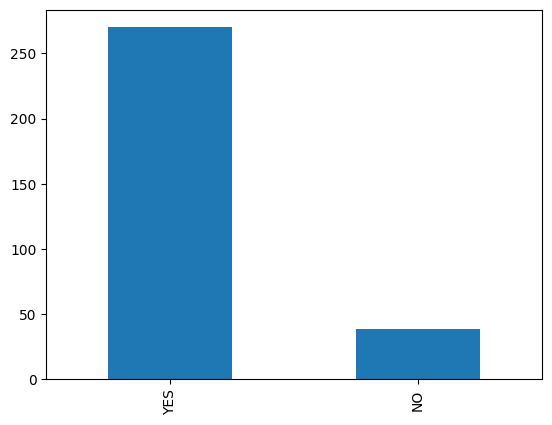

In [23]:
#plot a bar chat to display the class distribution

dataframe['LUNG_CANCER'].value_counts().plot.bar()








Data preprocesing
This is done to put the data in an appropriate format before modelling

In [24]:
#we will now seperate the feature values from the class. we do this because scikit-learn requires that features and class are separated before parsing them to the classifiers.

X=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]

In [25]:
print(X.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0                    2                      2           

In [26]:

X.shape

(309, 15)

In [27]:

print(y.head())

0    YES
1    YES
2     NO
3     NO
4     NO
Name: LUNG_CANCER, dtype: object


In [28]:
y.shape

(309,)

Encode labels

The labels for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms, hence we encoding the labels.

In [30]:
#let's encode target labels (y) with values between 0 and n_classes-1.
#encoding will be done using the LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [32]:
labels


array(['NO', 'YES'], dtype=object)

In [33]:
classes

array([0, 1])

Data Splitting
We will now split the data into training and test subsets. The training data is initially parsed to the machine learning model. this is to enable the model to identify discriminatory patterns which can be used to make future predictions. The testing data is used to evaluate the model after the training phase.

In [56]:
#split data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [58]:
#Check for null values
dataframe.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Great we have no null values in the dataset!

In [60]:
#Check for duplicates in the dataset
dataframe.duplicated().sum()

33

In [62]:
dataframe.drop_duplicates(inplace=True)

In [63]:
dataframe.shape

(276, 16)

 | Encoding of Categorical Columns

A short preprocessing step before we move on to Exploratory Data Analysis for easy implementation of graphs. Here we are encoding LUNG_CANCER and GENDER column.

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataframe['LUNG_CANCER']=encoder.fit_transform(dataframe['LUNG_CANCER'])
dataframe['GENDER']=encoder.fit_transform(dataframe['GENDER'])
dataframe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


3 | Exploratory Data Analysis

In [67]:
#separating continuous and categorical columns
con_col = ['AGE']
cat_col=[]
for i in dataframe.columns:
    if i!='AGE':
        cat_col.append(i)

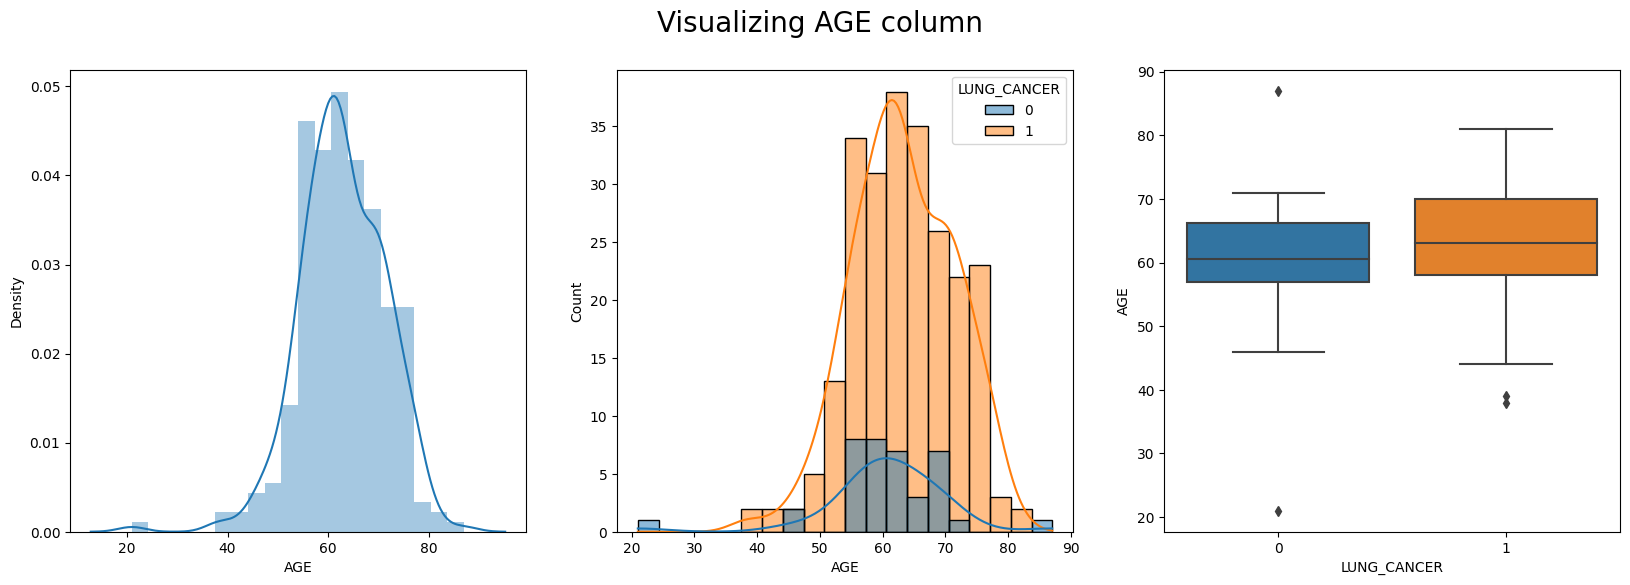

In [70]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(dataframe['AGE'],ax=ax[0])
sns.histplot(data =dataframe,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=dataframe['LUNG_CANCER'],y=dataframe['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

Observations:
Some outliers are present in the dataset. Inferred from box-plot.
Most common age ranges from 50-70. This was also inferred from describe method.

Text(0.5, 0.98, 'Visualizing Categorical Columns')

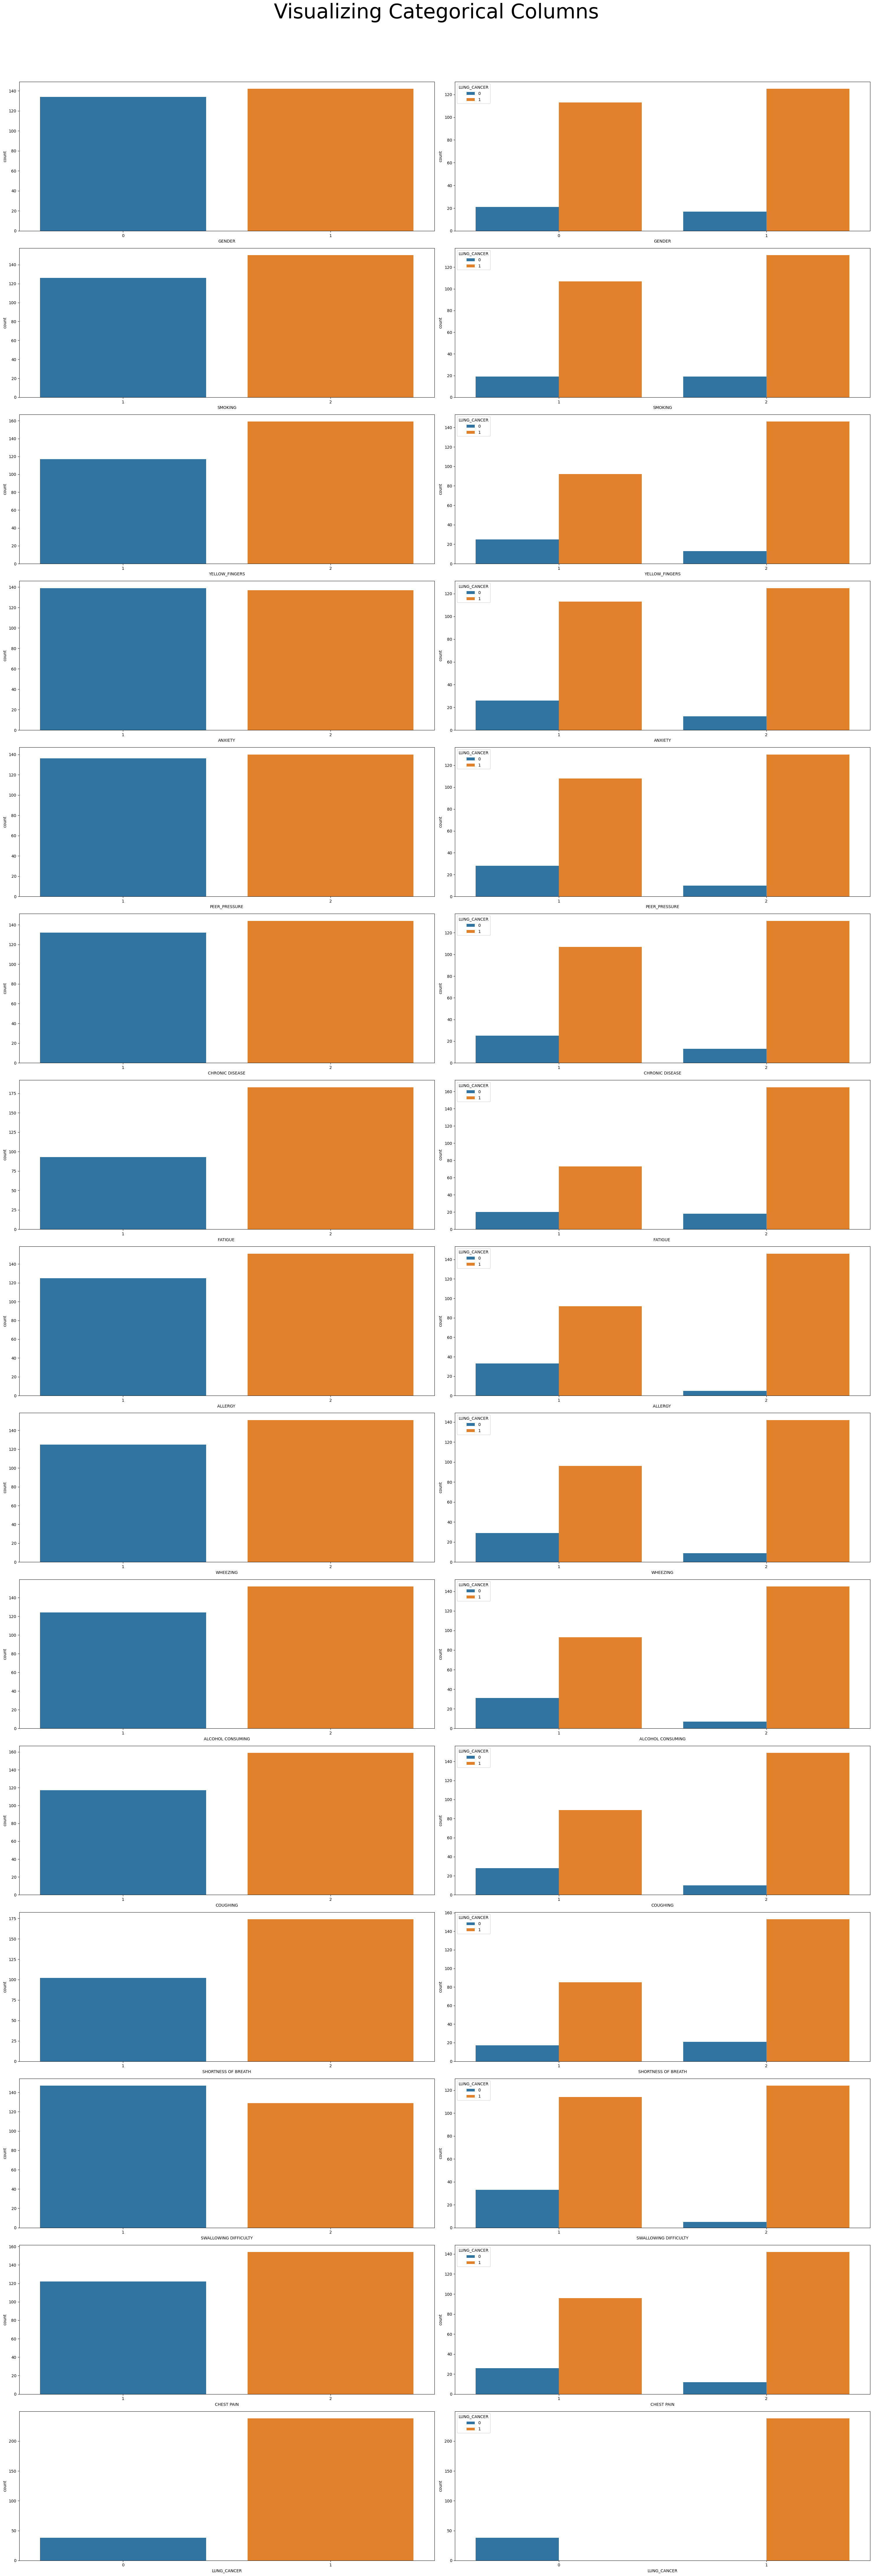

In [71]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=dataframe,x=i,ax=ax[index,0])
    sns.countplot(data=dataframe,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

Observations:
There is a huge imabalance present in the dataset. Samples with Lung Cancer are present in higher numbers.
All the observations made from describe function is confirmed here.

Text(0.5, 0.98, 'Visualizing AGE vs Categorical Columns')

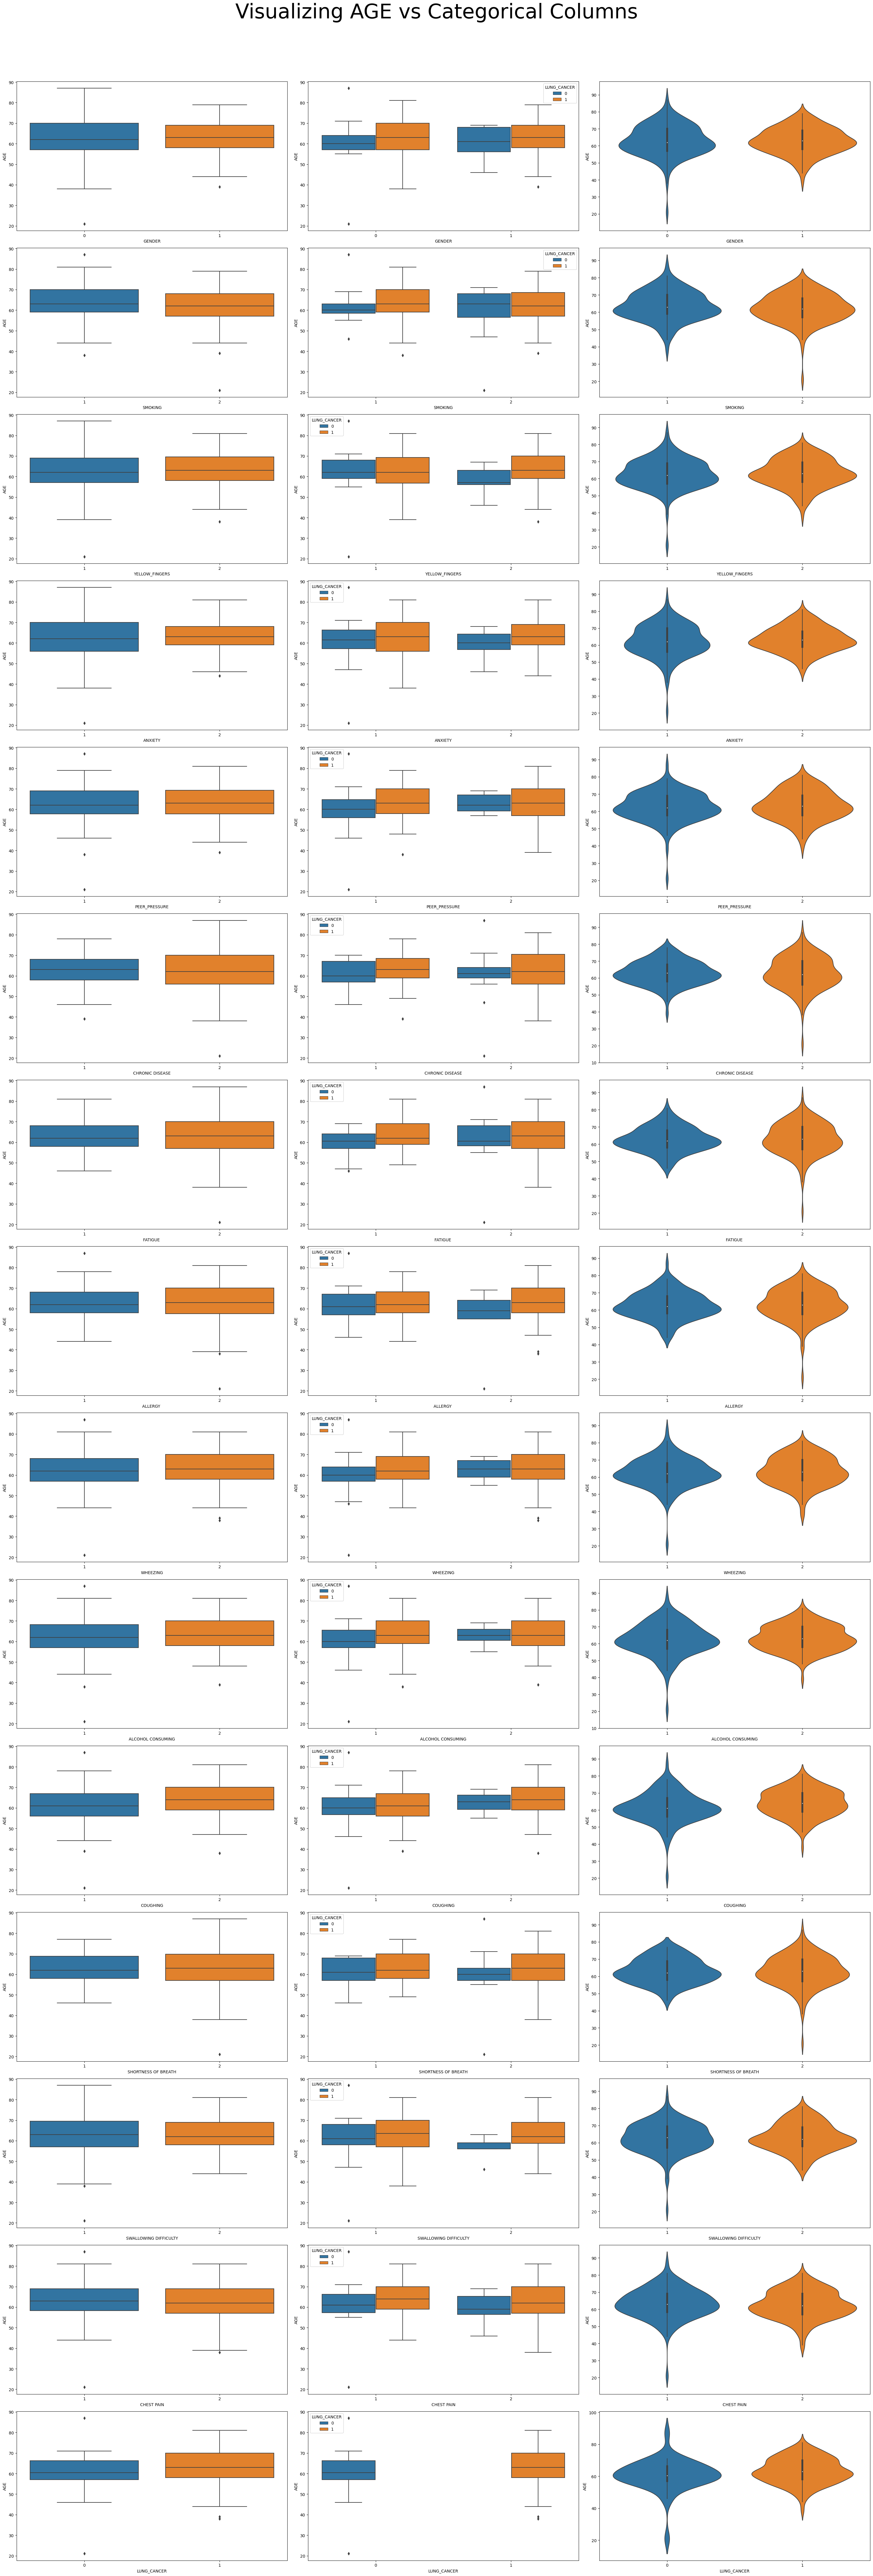

In [73]:
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.boxplot(x=dataframe[i],y=dataframe['AGE'],ax=ax[index,0])
    sns.boxplot(x=dataframe[i],y=dataframe['AGE'],ax=ax[index,1],hue=dataframe['LUNG_CANCER'])
    sns.violinplot(x=dataframe[i],y=dataframe['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing AGE vs Categorical Columns",fontsize=50)

<Axes: >

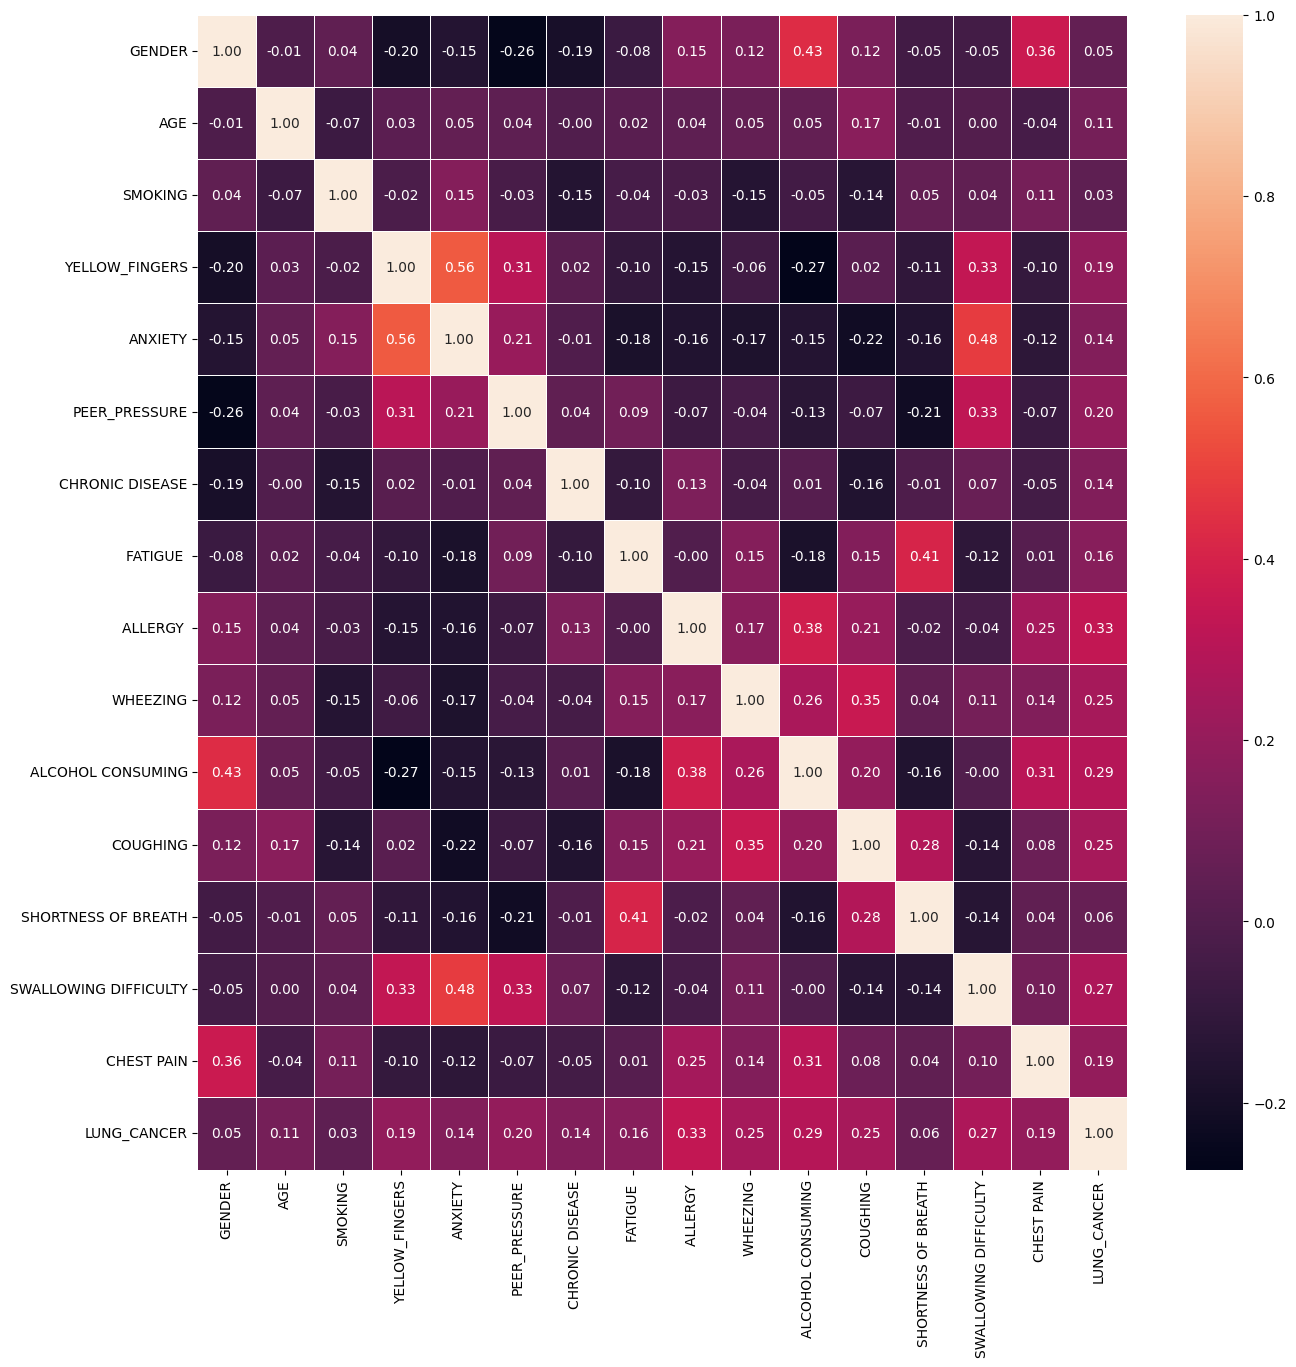

In [74]:
plt.figure(figsize=(15,15))
sns.heatmap(dataframe.corr(),annot=True,linewidth=0.5,fmt='0.2f')

Observations:
There is multicollinearity present in the data.

4 | Data Preprocessing
👉 | Separating Independent and Dependent Features

In [75]:
X=dataframe.drop(['LUNG_CANCER'],axis=1)
y=dataframe['LUNG_CANCER']

👉 | Changing values of columns from 2,1 to 1,0

In [76]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


👉 | Oversampling of Minority Class

In [77]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

👉 | Train Test Split

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


👉 | Scaling of AGE column

In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
321,1,-0.943664,0,1,0,0,0,1,0,1,1,1,1,0,0
336,1,0.822129,1,0,0,1,0,0,0,0,0,0,0,0,1
334,1,-2.078817,0,1,1,0,0,0,0,0,0,0,0,1,1
151,0,0.191489,1,1,0,1,1,0,0,0,0,0,0,0,0
314,0,-0.691408,1,1,0,0,0,0,0,0,0,0,1,0,0


5 |Model Building

Recall=TruePositives(TruePositives/(TruePositives+FalseNegatives))

Recall would be the best metric because here were are concerned about measuring how many Lung Cancer Patients were missclassified as Non Lung Cancer.
Reduce False Negatives!

👉 | KNeighbors Classifier - 78%

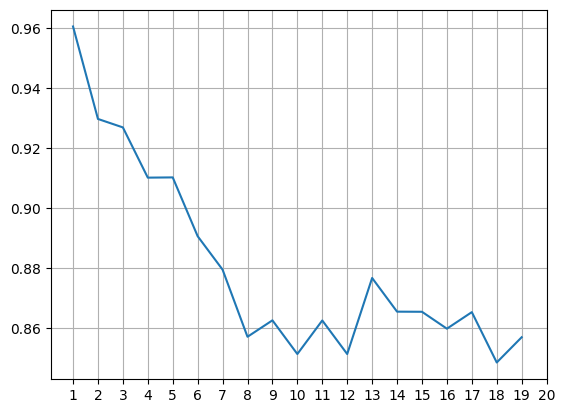

In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        60
           1       1.00      0.86      0.93        59

    accuracy                           0.93       119
   macro avg       0.94      0.93      0.93       119
weighted avg       0.94      0.93      0.93       119



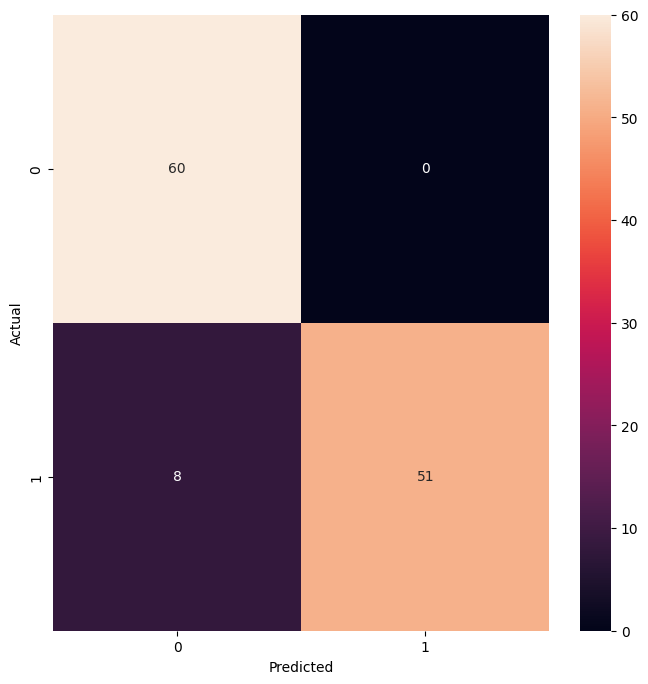

In [81]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

👉 | Support Vector Machine - 98%

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        59

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119


Best Parameters of SVC model is : {'gamma': 100, 'C': 1}



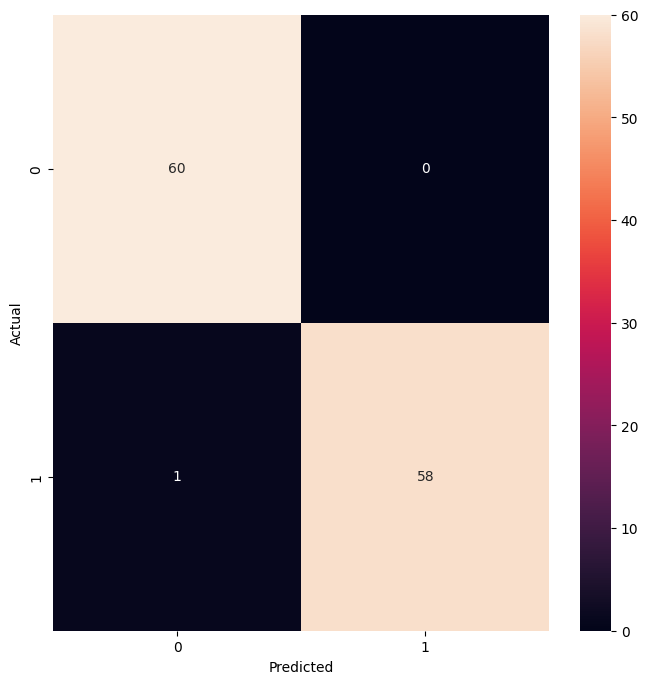

In [82]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

👉 | Logistic Regression - 85%

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        60
           1       0.94      0.83      0.88        59

    accuracy                           0.89       119
   macro avg       0.90      0.89      0.89       119
weighted avg       0.90      0.89      0.89       119



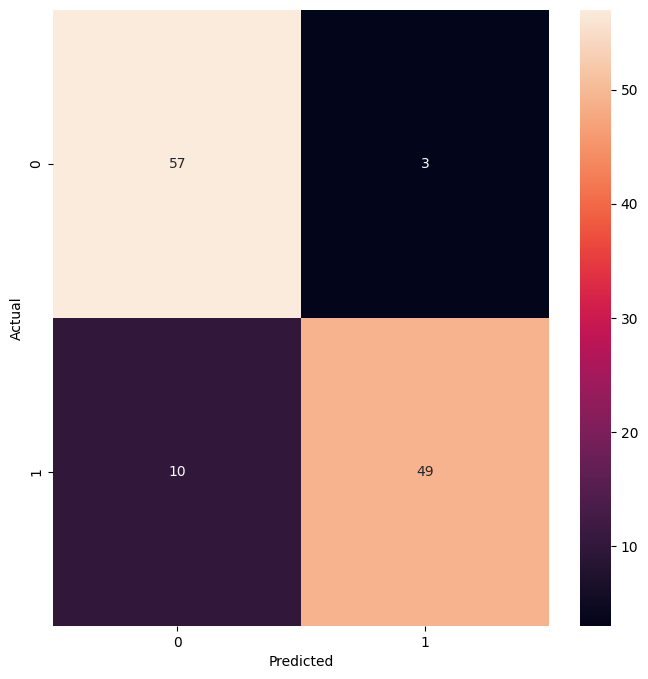

In [83]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))

👉 | Random Forest Classifier - 88%

              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.88      0.94        59

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119


Best Parameter: {'n_estimators': 50}



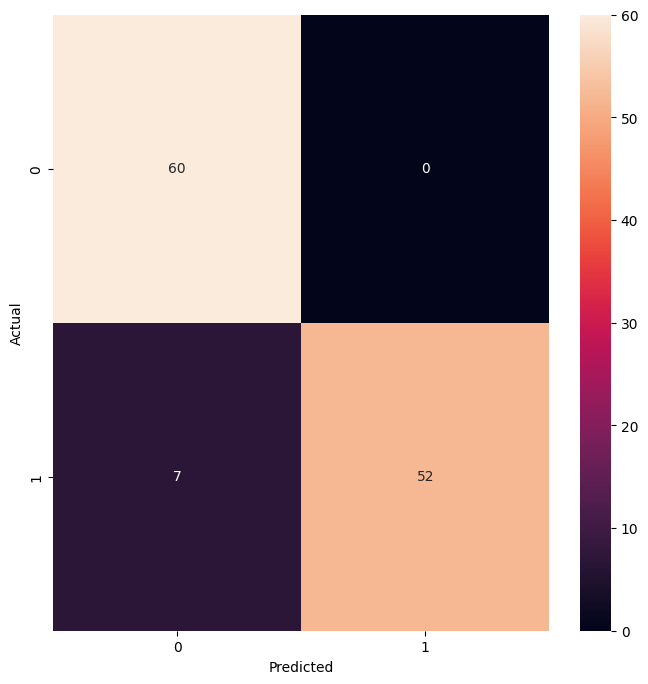

In [84]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

👉 | Gradient Boosting Classifier - 88%

              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.88      0.94        59

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119


Best Parameter: {'n_estimators': 300, 'learning_rate': 0.75}



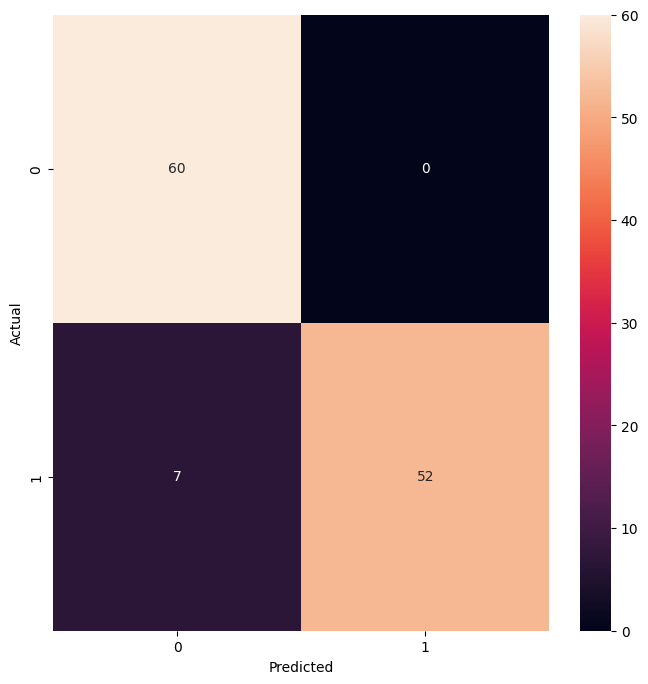

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

👉 | LGBM Classifier - 90%

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 179, number of negative: 178
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 61
[LightGBM] [Info] Number of data points in the train set: 357, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501401 -> initscore=0.005602
[LightGBM] [Info] Start training from score 0.005602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

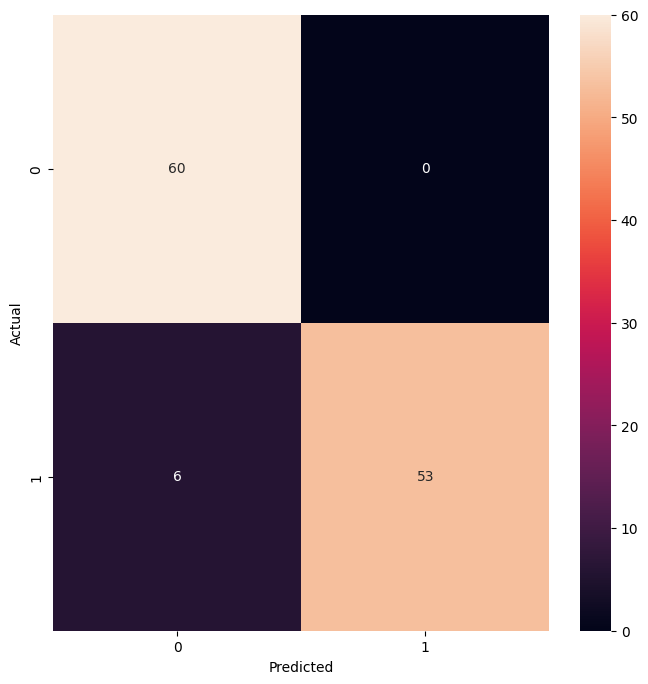

In [89]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

👉 | Selected Model - SVC

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      0.97      0.98        59

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



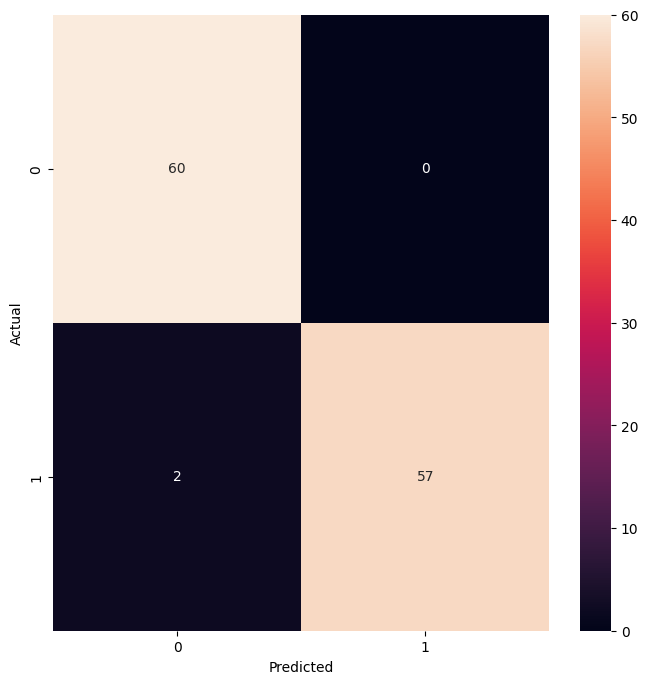

In [90]:
model = SVC(gamma=10,C=100)
model.fit(X_train,y_train)
y_pred_svc=model.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

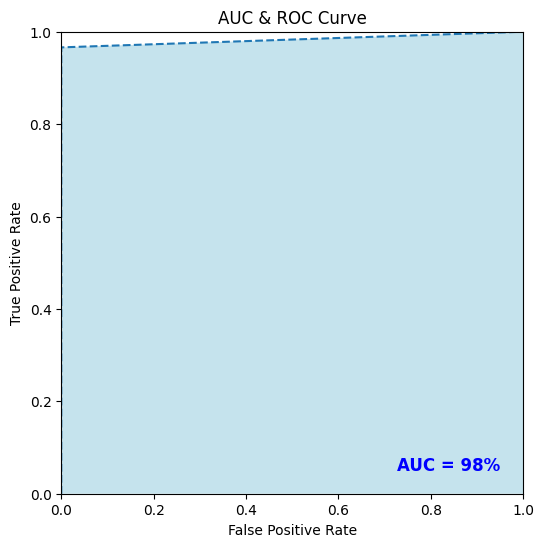

In [108]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_svc)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_svc)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, '--')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)

# Convert AUC to an integer percentage
auc_percentage = int(auc * 100)

# Display the AUC as an integer percentage in the plot
plt.text(0.95, 0.05, f'AUC = {auc_percentage}%', ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


6 |Conclusion
Support Vector Machine is selected.
* Recall - 98%
* Accuracy - 99%
* It has only one missclassification.
* AUC - 0.9831% = 98%

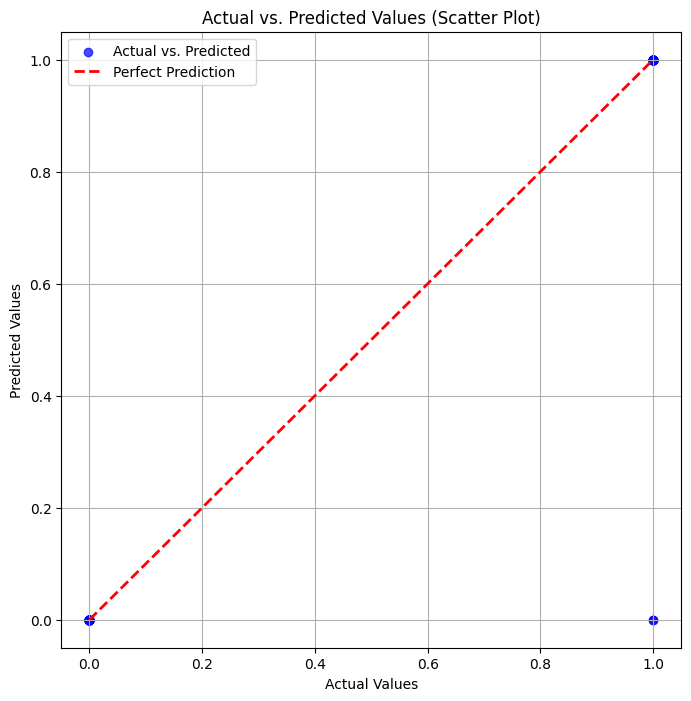

In [95]:
import matplotlib.pyplot as plt
# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_svc, c='blue', label='Actual vs. Predicted', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Scatter Plot)')
plt.legend()
plt.grid()
plt.show()

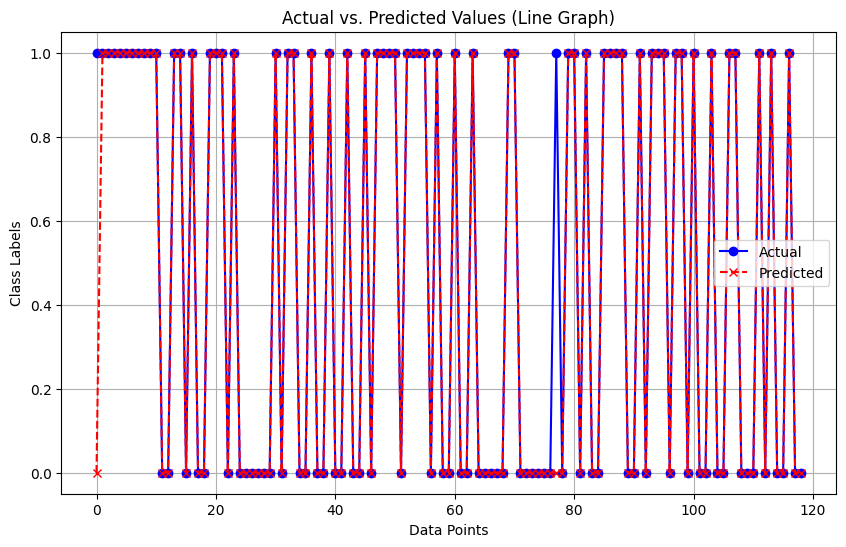

In [96]:
# Create a range of values for the x-axis (predicted values)
x_values = range(len(y_test))

# Create a line graph to compare actual vs. predicted values
plt.figure(figsize=(10, 6))

# Plot the actual values as a blue line
plt.plot(x_values, y_test, label="Actual", marker='o', linestyle='-', color='blue')

# Plot the predicted values as a red dashed line
plt.plot(x_values, y_pred_svc, label="Predicted", marker='x', linestyle='--', color='red')

plt.xlabel("Data Points")
plt.ylabel("Class Labels")
plt.title("Actual vs. Predicted Values (Line Graph)")
plt.legend()
plt.grid()
plt.show()
